In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import show
from datetime import datetime,date
from matplotlib.font_manager import FontProperties

In [2]:
crime_data = pd.read_csv('/Users/ameykelekar/Documents/DataAnalysisUsingPython/Data Analysis on Crime in Chicago/Chicago_crime/Crimes_-_2001_to_present.csv')

In [3]:
crime_data.head(5)

ID Case Number                    Date                  Block  IUCR  \
0  6309193    HP390075  06/11/2008 11:00:00 PM        045XX W 87TH ST  4387   
1  6309194    HP399120  06/16/2008 07:05:27 PM  010XX N MASSASOIT AVE  0810   
2  6309195    HP383610  06/08/2008 10:50:00 PM   050XX S CAMPBELL AVE  0486   
3  6309196    HP392398  06/13/2008 09:10:00 AM   076XX S CARPENTER ST  1310   
4  6309197    HP398014  06/16/2008 08:50:00 AM    022XX W WARREN BLVD  0810   

      Primary Type                  Description Location Description Arrest  \
0    OTHER OFFENSE  VIOLATE ORDER OF PROTECTION            APARTMENT  False   
1            THEFT                    OVER $500            RESIDENCE  False   
2          BATTERY      DOMESTIC BATTERY SIMPLE            APARTMENT  False   
3  CRIMINAL DAMAGE                  TO PROPERTY            RESIDENCE  False   
4            THEFT                    OVER $500               STREET  False   

  Domestic              ...                Ward  Community Area  FBI Code  \
0     True              ...                18.0            70.0        26   
1    False              ...                29.0            25.0        06   
2     True              ...                14.0            63.0       08B   
3    False              ...                17.0            71.0        14   
4    False              ...                 2.0            28.0        06   

   X Coordinate Y Coordinate  Year              Updated On   Latitude  \
0     1147487.0    1846446.0  2008  02/04/2016 06:33:39 AM  41.734598   
1     1137833.0    1906342.0  2008  02/04/2016 06:33:39 AM  41.899141   
2     1160554.0    1871189.0  2008  02/04/2016 06:33:39 AM  41.802238   
3     1170638.0    1854168.0  2008  02/04/2016 06:33:39 AM  41.755316   
4     1161454.0    1900313.0  2008  02/04/2016 06:33:39 AM  41.882138   

   Longitude                       Location  
0 -87.735264   (41.734598385, -87.73526384)  
1 -87.769192  (41.899141429, -87.769191932)  
2 -87.686710  (41.802237609, -87.686710161)  
3 -87.650224  (41.755315836, -87.650223819)  
4 -87.682600   (41.88213835, -87.682600206)  

[5 rows x 22 columns]

In [4]:
t1 = datetime.strptime('08/29/2004 02:30:00 AM','%m/%d/%Y %I:%M:%S %p')
str(t1.hour)+':00'

'2:00'

In [5]:
crime_data['Hour'] = crime_data['Date'].apply(lambda x: str(datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p').hour)+':00')

In [6]:
crime_data[crime_data['Year'] == 2014]['Hour'].value_counts().head(2)

19:00    16424
12:00    15792
Name: Hour, dtype: int64

In [7]:
(100*crime_data[crime_data['Year'] == 2014]['Hour'].value_counts()/len(crime_data[crime_data['Year'] == 2014])).head(5)

19:00    5.983918
12:00    5.753655
18:00    5.704834
20:00    5.626136
15:00    5.611563
Name: Hour, dtype: float64

In [8]:
crime_data['Year'].value_counts()

2002    486736
2001    485721
2003    475904
2004    469345
2005    453662
2006    448034
2007    436918
2008    426957
2009    392547
2010    370126
2011    351539
2012    335657
2013    306686
2014    274469
2015    262902
2016    244379
Name: Year, dtype: int64

In [9]:
df1 = crime_data.groupby(['Year','Hour']).size().reset_index(name="Crime Count")

In [10]:
df1.head(5)

Year   Hour  Crime Count
0  2001   0:00        25091
1  2001  10:00        19955
2  2001  11:00        20889
3  2001  12:00        26925
4  2001  13:00        23014

In [11]:
crime_count_percentage = df1.groupby(['Year', 'Hour']).agg({'Crime Count': 'sum'})

In [12]:
crime_pcts = crime_count_percentage.groupby(level=0).apply(lambda x: 100*x/float(x.sum())).reset_index()

In [13]:
df_agg = crime_pcts.groupby(['Year','Hour']).agg({'Crime Count':sum})

In [14]:
g = df_agg['Crime Count'].groupby(level=0, group_keys=False)

In [15]:
res = g.apply(lambda x: x.sort_values(ascending=False).head(5)).reset_index()

In [16]:
res.head(5)

Year   Hour  Crime Count
0  2001  20:00     5.892683
1  2001  18:00     5.830919
2  2001  19:00     5.823302
3  2001  21:00     5.794685
4  2001  22:00     5.759273

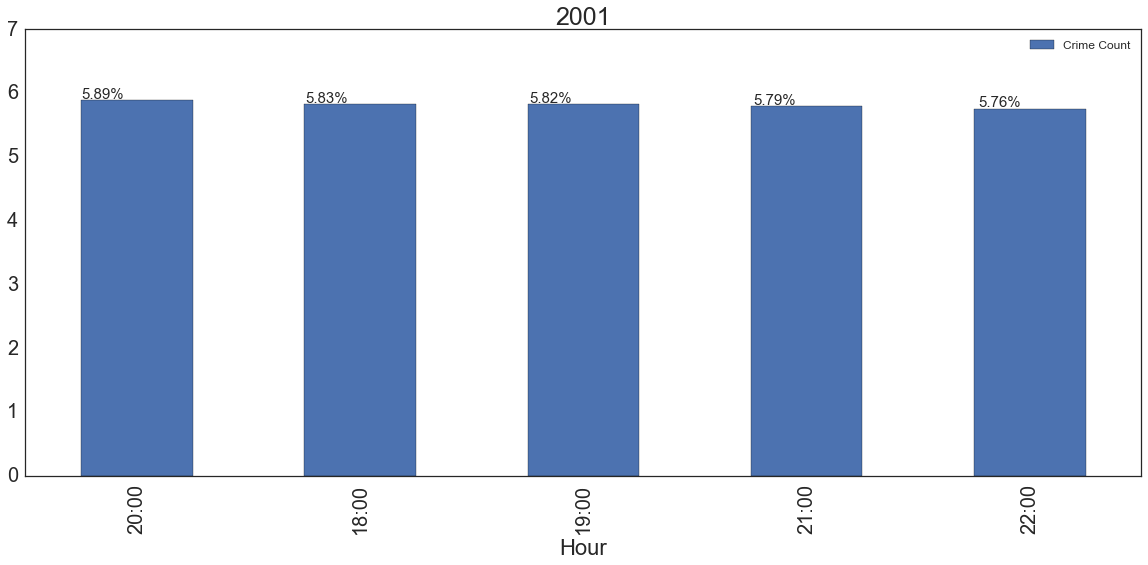

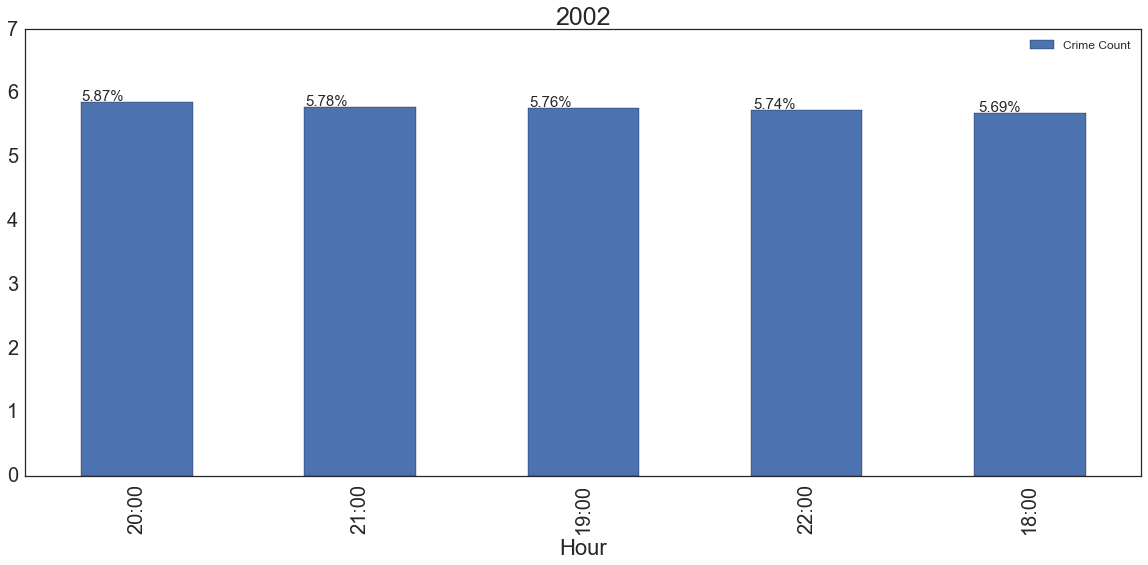

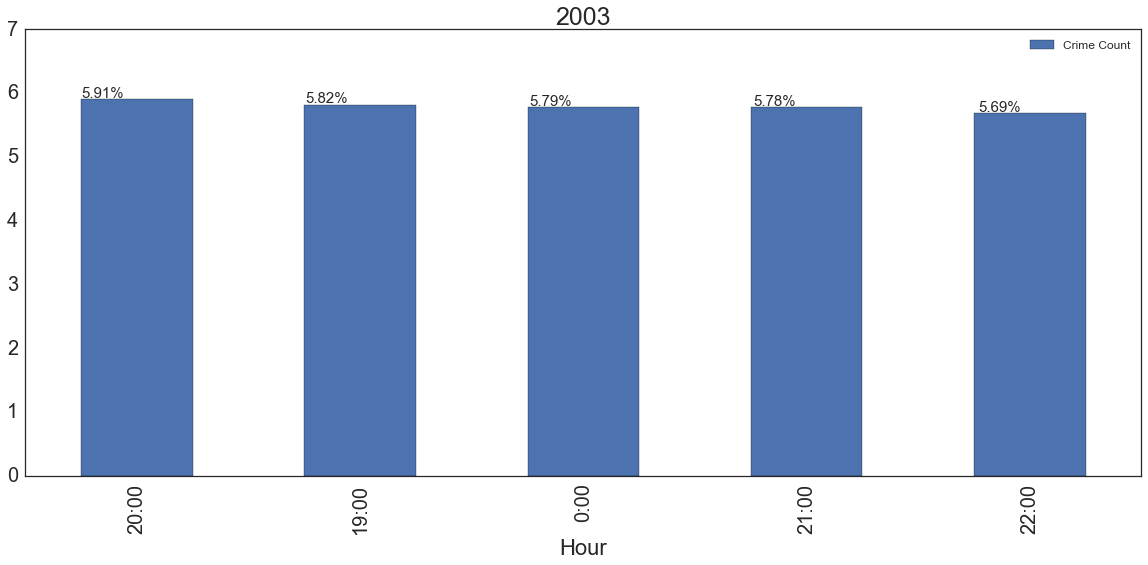

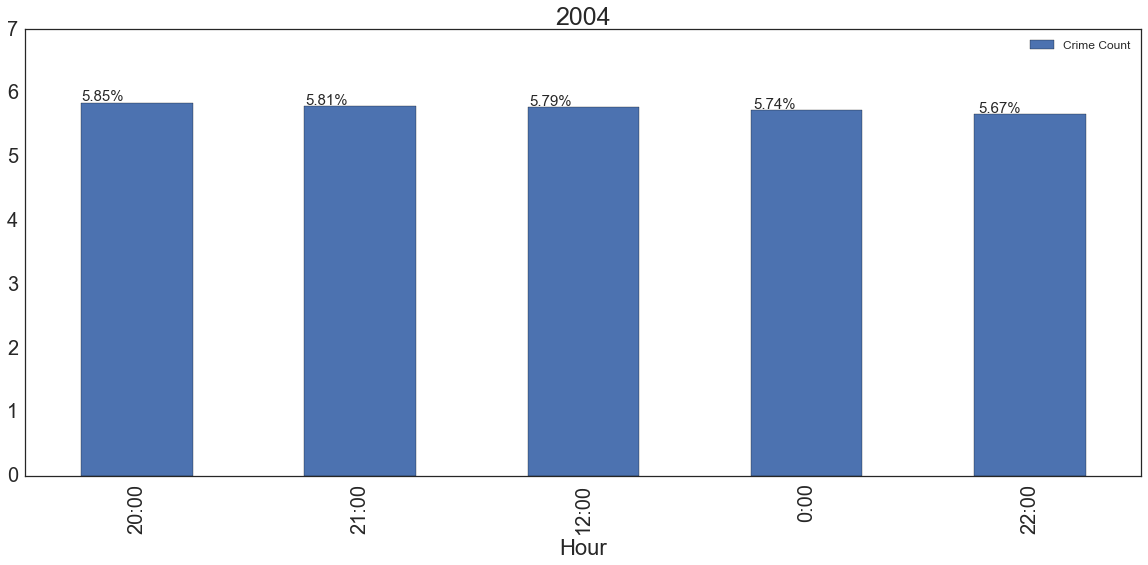

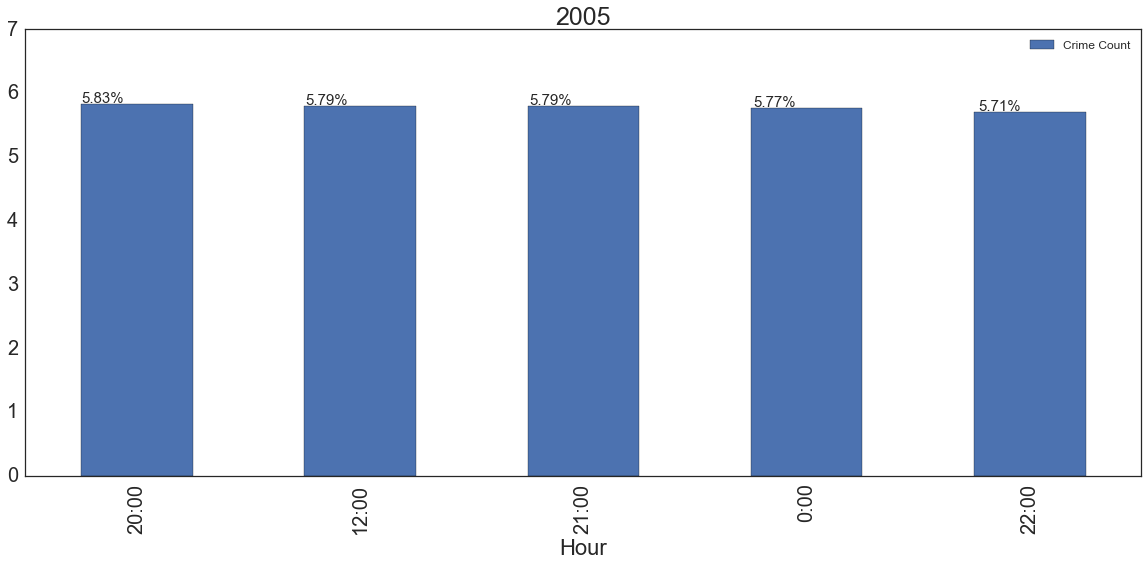

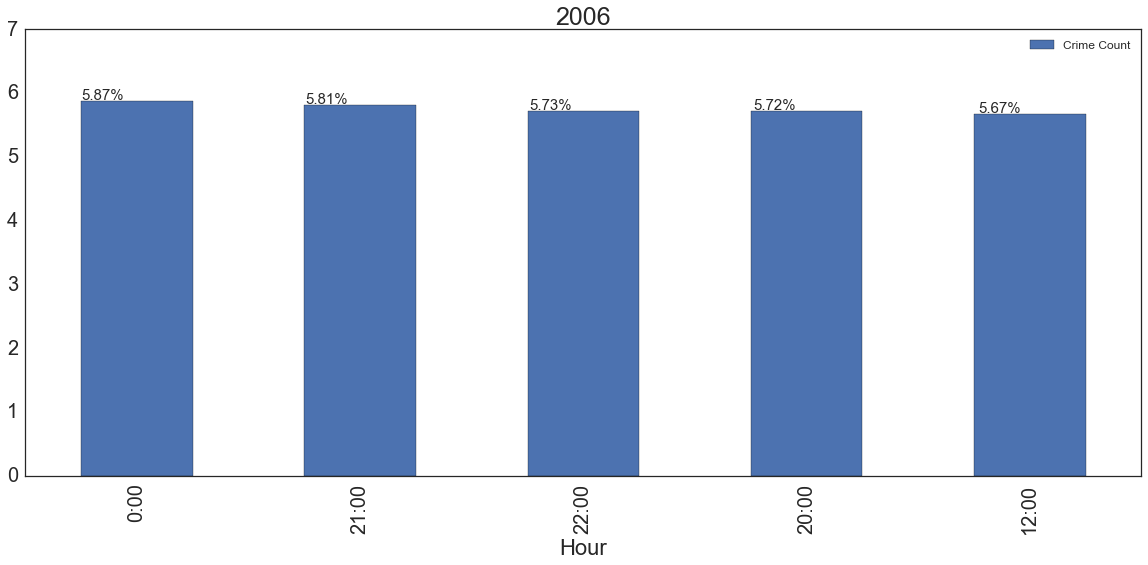

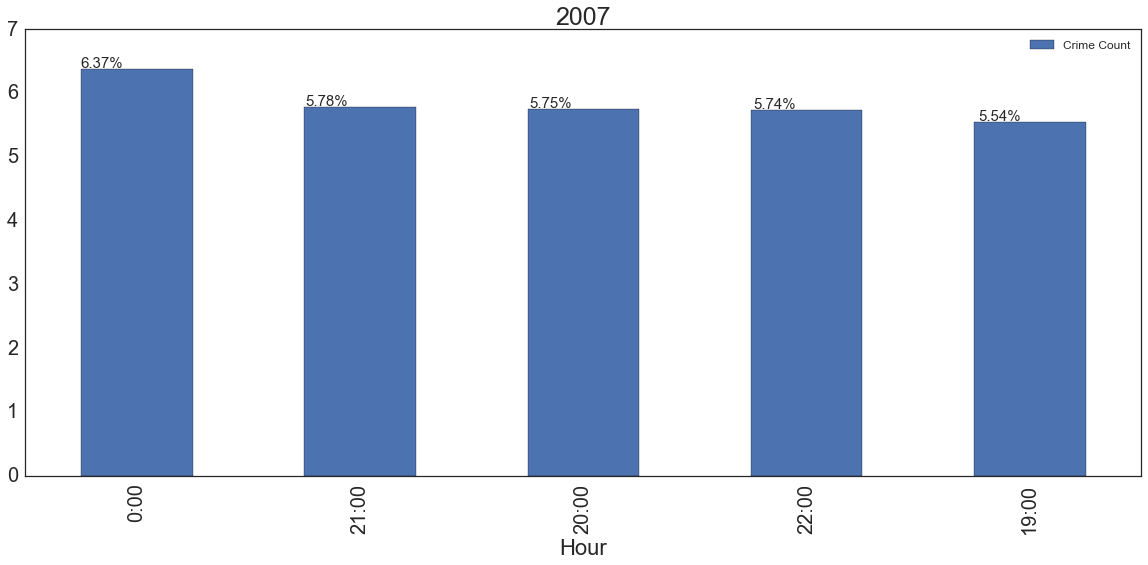

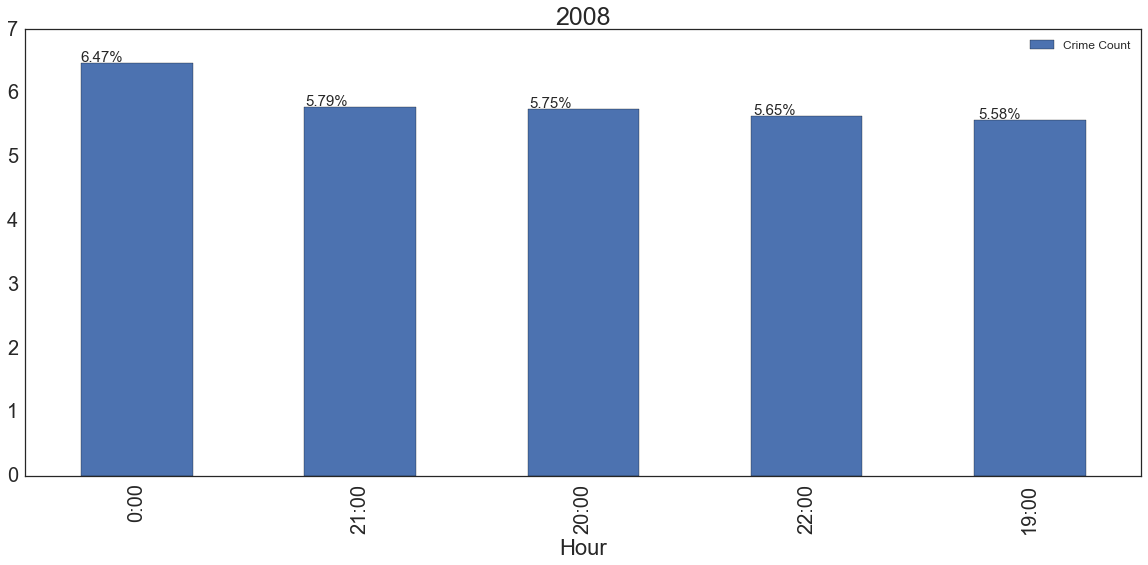

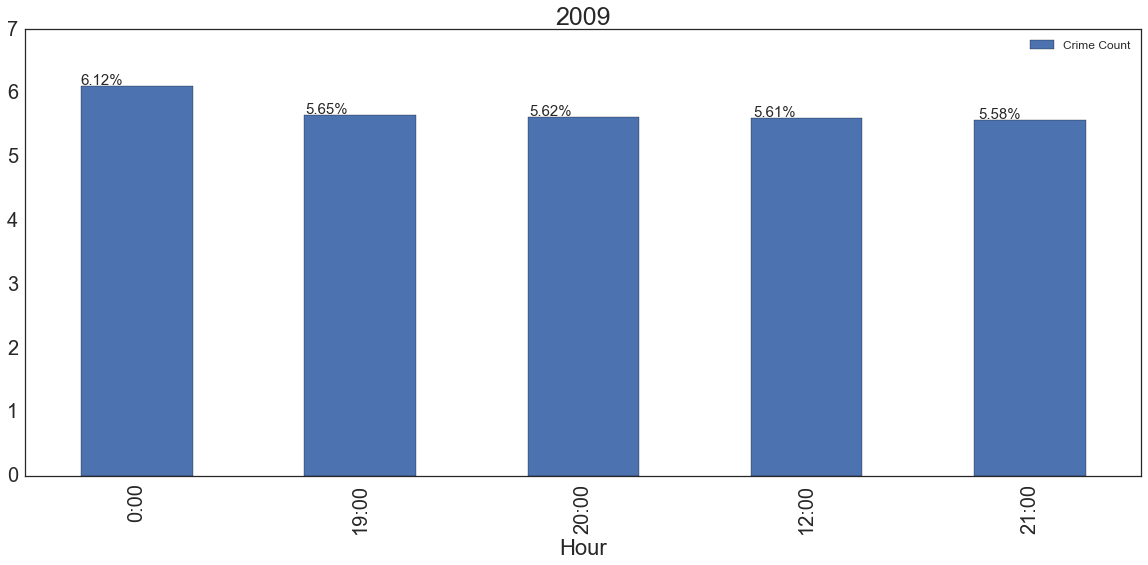

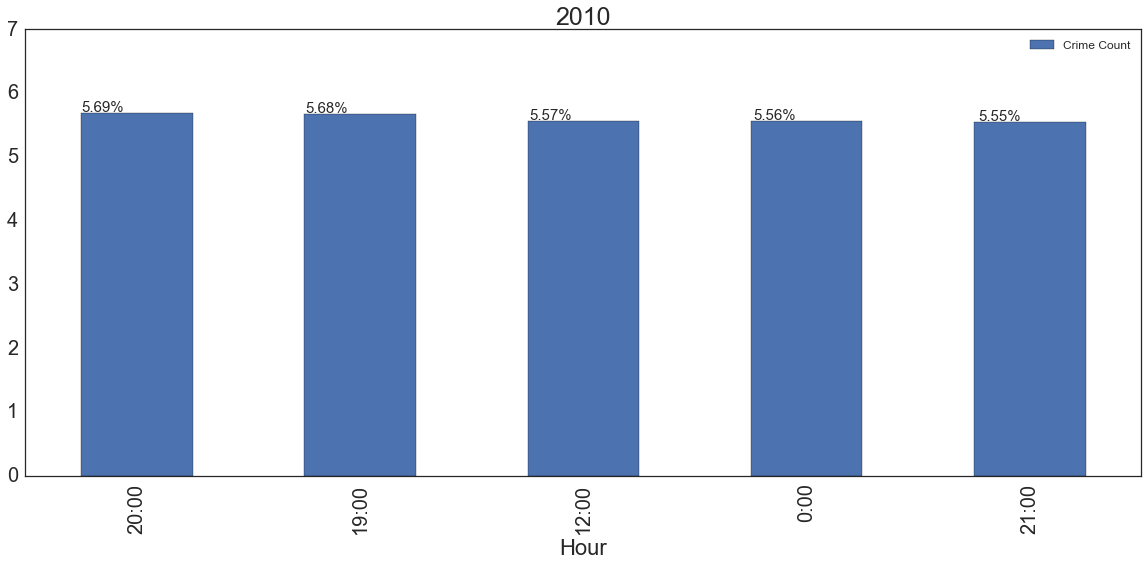

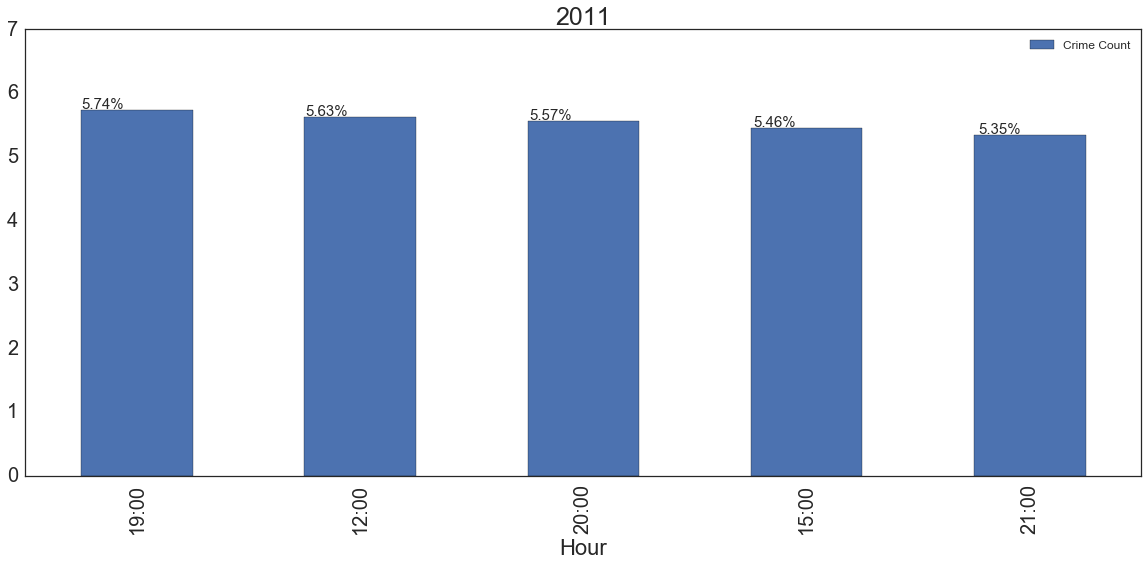

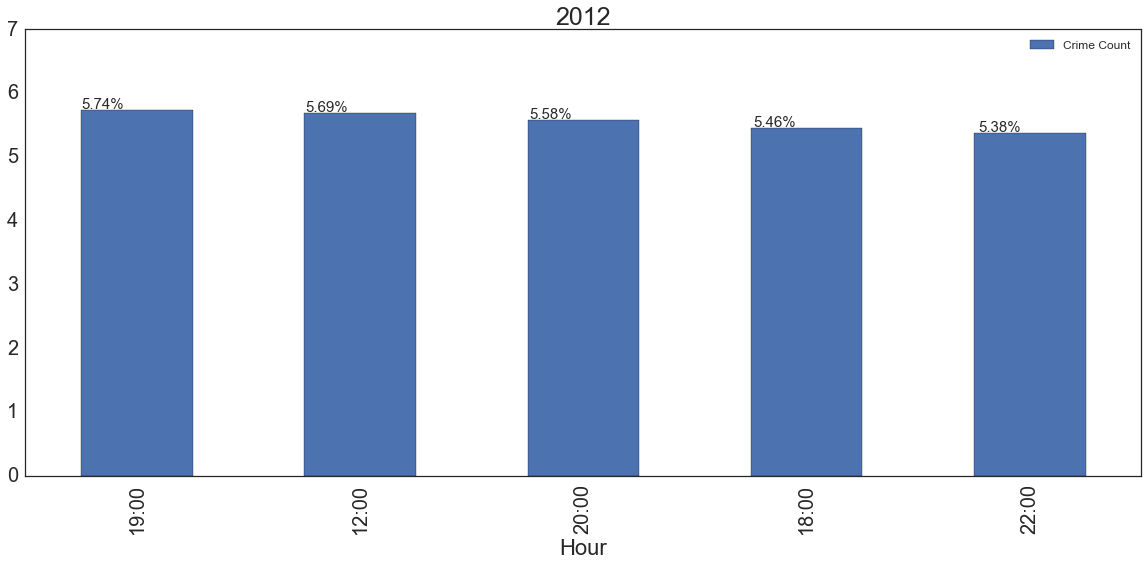

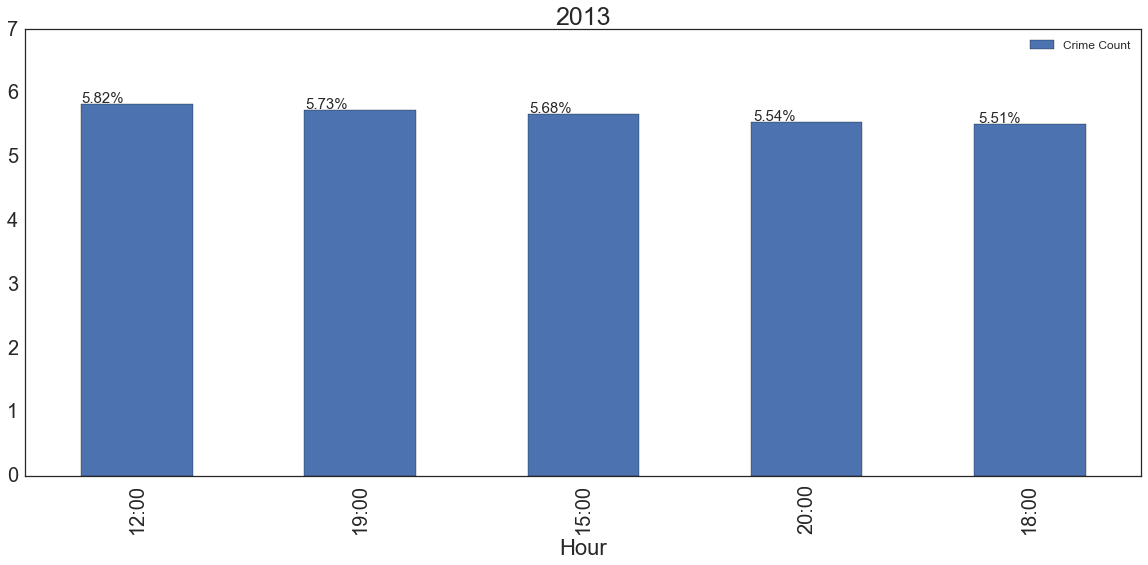

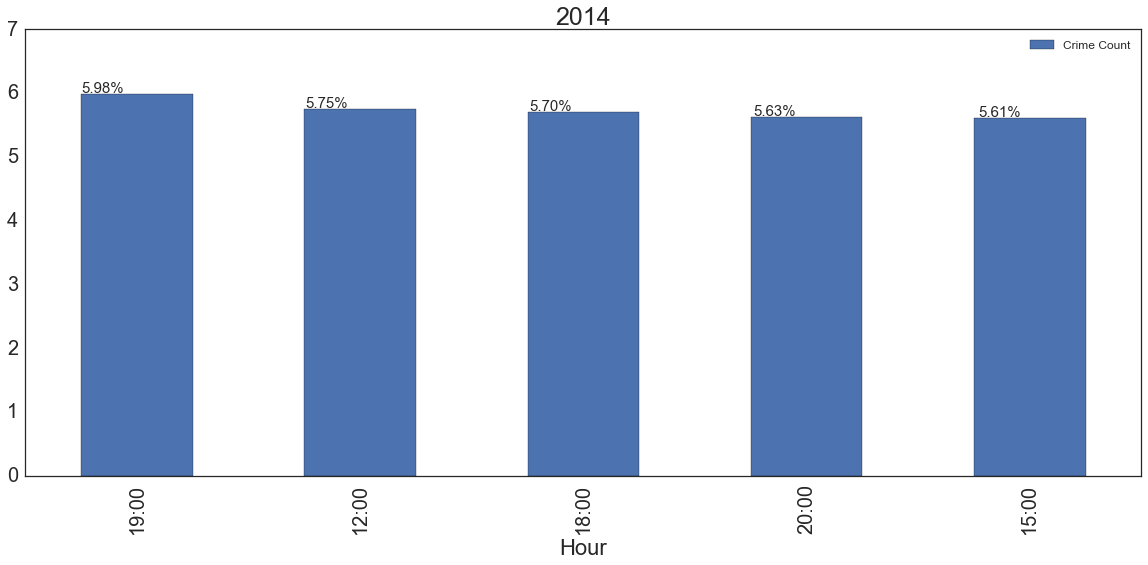

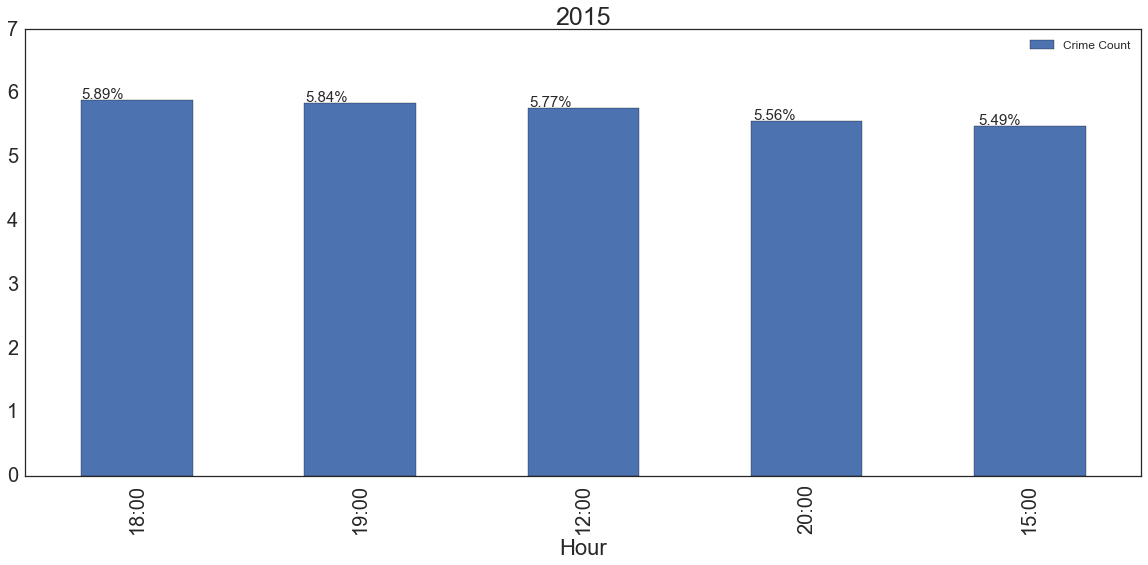

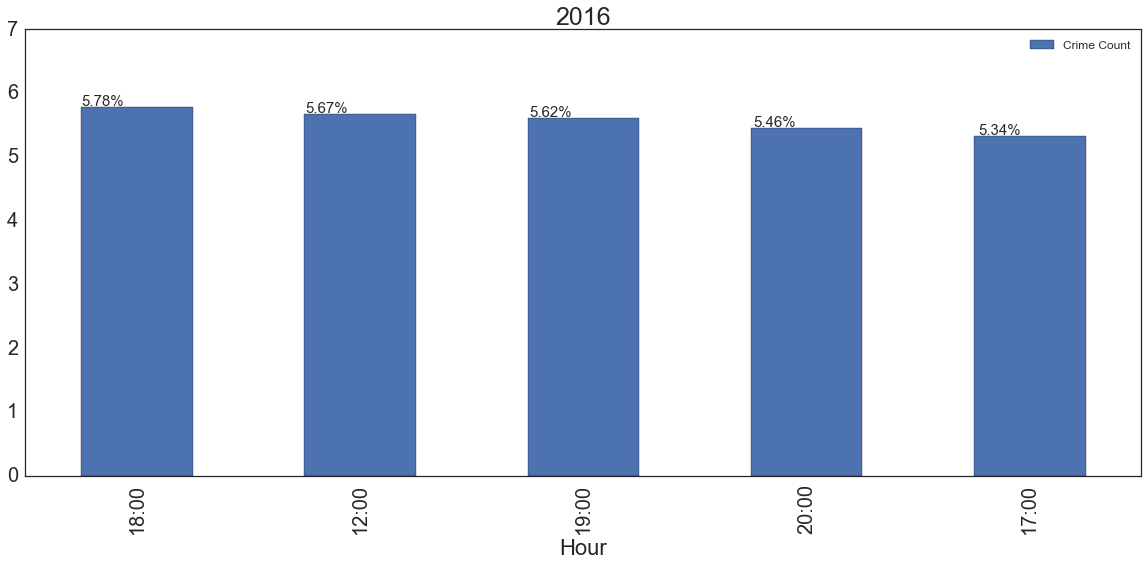

In [17]:
sns.set_style('white')
fontP = FontProperties()
for i, group in res.groupby('Year'):
    fig = plt.figure()
    ax = group.plot(x='Hour', y='Crime Count', kind = 'bar', title= str(i), figsize=(20,8), fontsize = 20, legend= True)
    ax.set_ybound(0,7)
    ax.title.set_fontsize(25)
    ax.xaxis.get_label().set_fontsize(22)
    legend = ax.legend(loc=0, ncol=1, bbox_to_anchor=(0, 0, 1, 1), prop = fontP,fancybox=True,shadow=False)
    plt.setp(legend.get_title(),fontsize=20)

    for p in ax.patches: 
        ax.annotate(str('%1.2f'%(p.get_height())+'%'),(p.get_x() * 1.005, p.get_height() * 1.005),fontsize=15)
    
    plt.show()